In [77]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')


Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [78]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

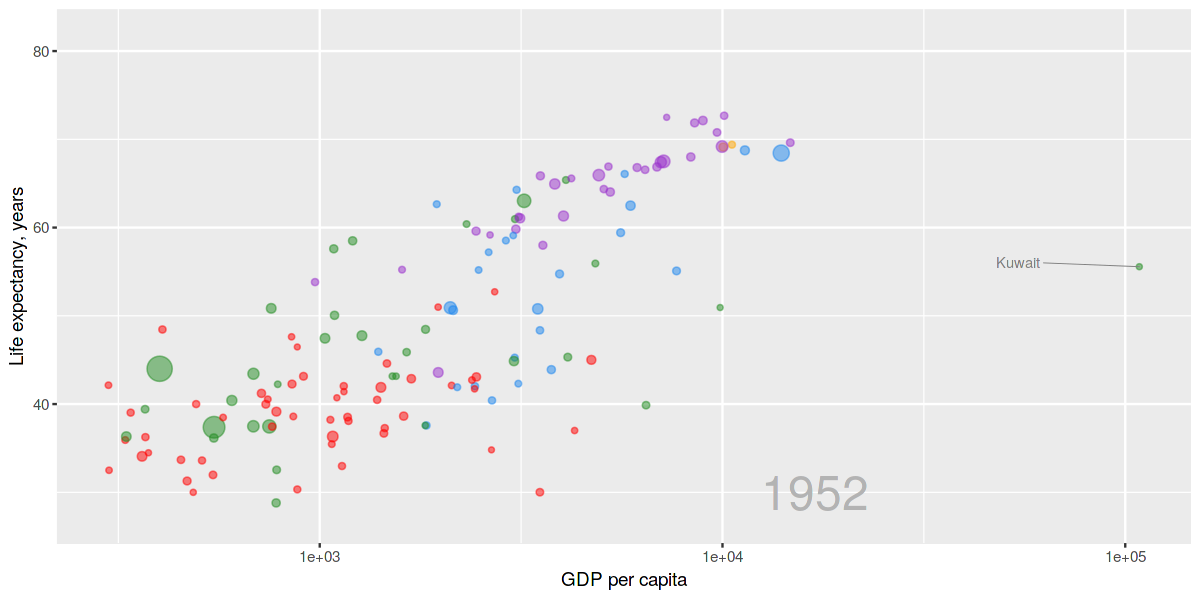

In [179]:
options(repr.plot.res = 120, repr.plot.height = 5, repr.plot.width = 10)


p = ggplot(df.1952, aes(x = gdpPercap, y = lifeExp, color=continent)) + geom_point(aes(size=pop),show.legend=FALSE, alpha=0.5)

p = p + xlab("GDP per capita") + ylab("Life expectancy, years")

p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
p = p + ylim(c(27, 82))
p = p + scale_x_log10()
p = p + scale_color_manual(values = c('red',
                                      'dodgerblue2',
                                      'forestgreen',
                                      'darkorchid',
                                      'orange'))

gapminder_filtered = df.1952 %>% filter(country == 'Kuwait')

p = p + geom_text_repel(data= gapminder_filtered,
        nudge_y = 56 - gapminder_filtered$lifeExp,
        nudge_x = -.3,
        segment.size = 0.2,
        size = 3,
        segment.color = "grey50",
        aes(label = country), 
        show.legend = FALSE, color= "grey50")
    
p = p + annotate("text", x = 17000, y = 30,
  label = 1952, color = "grey70", size=10) 
p



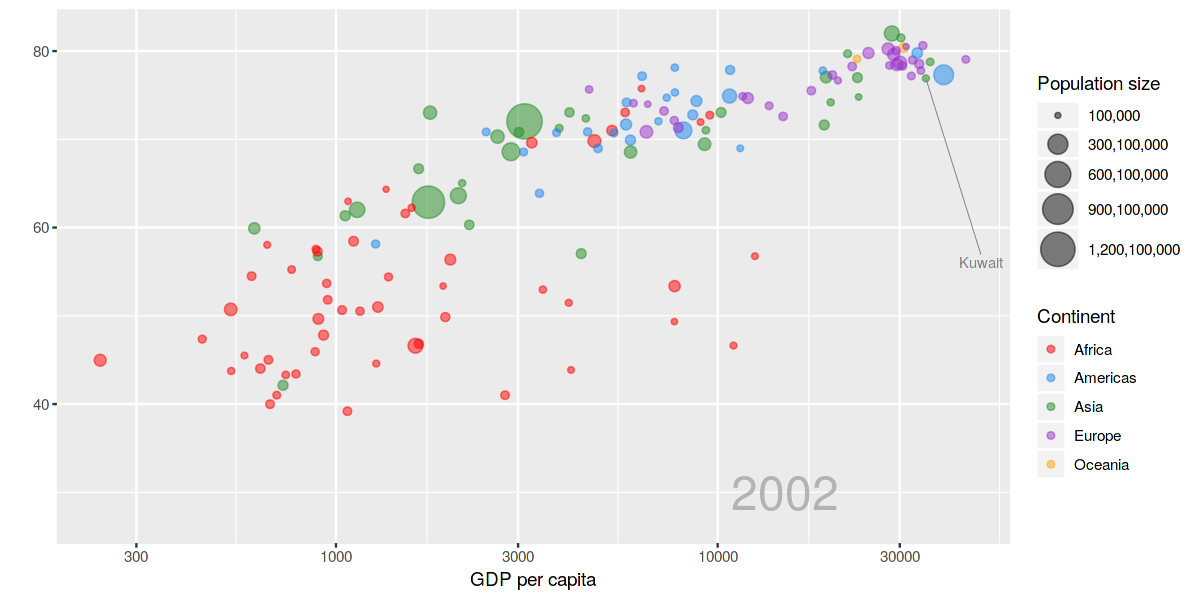

In [182]:
options(repr.plot.res = 120, repr.plot.height = 5, repr.plot.width = 10)
p2 = ggplot(df.2002, aes(x = gdpPercap, y = lifeExp, color=continent)) + geom_point(aes(size=pop), alpha=0.5)+labs(color= "Continent")+labs(size="Population size")

p2 = p2 + xlab("GDP per capita") + ylab(" ")

p2 = p2 + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
p2 = p2 + ylim(c(27, 82))
p2 = p2 + scale_x_log10()

gapminder_filtered = df.2002 %>% filter(country == 'Kuwait')

p2 = p2 + geom_text_repel(data= gapminder_filtered,
        nudge_y = 56 - gapminder_filtered$lifeExp,
        nudge_x = 1,
        segment.size = 0.2,
        size = 3,
        segment.color = "grey50",
        aes(label = country),show.legend=FALSE, color="grey50")
p2 = p2 + scale_color_manual(values = c('red',
                                      'dodgerblue2',
                                      'forestgreen',
                                      'darkorchid',
                                      'orange'))
    
p2 = p2 + annotate("text", x = 15000, y = 30,
  label = 2002, color = "grey70", size=10)

p2

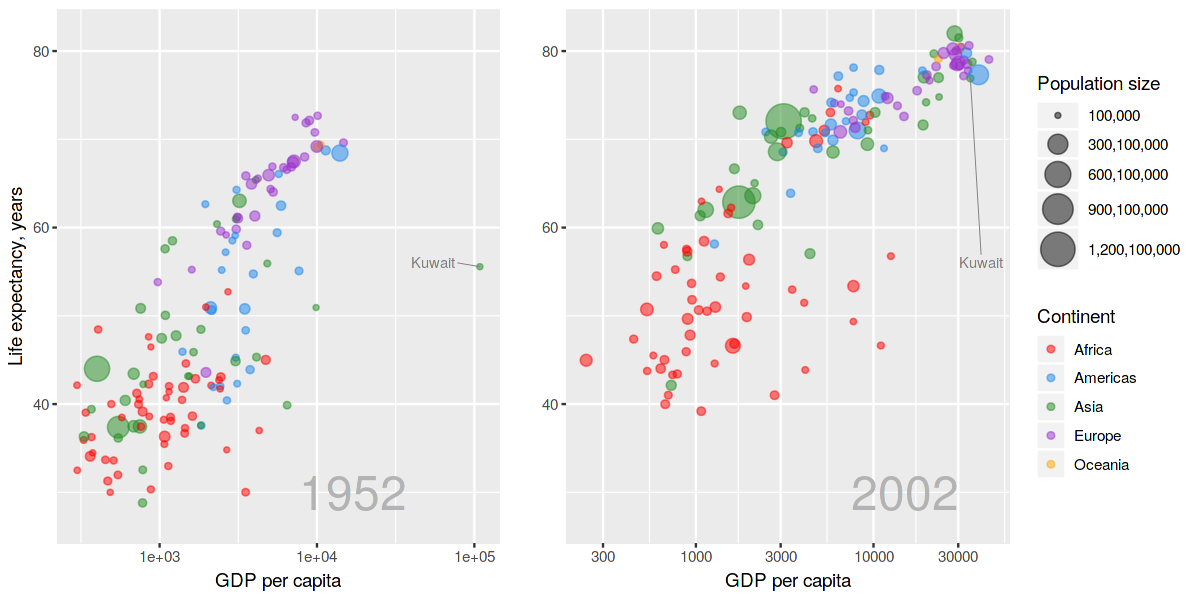

In [181]:
p + p2

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!